In [ ]:
import pandas as pd
data=pd.read_csv("/content/laptop_purchase_data_india.csv")
print(data)

     Customer_ID  Age  Gender       City Income_Level Purchase_Mode  \
0      CUST00001   56    Male       Pune          Low        Online   
1      CUST00002   46  Female    Kolkata       Medium        Online   
2      CUST00003   32    Male  Bangalore          Low        Online   
3      CUST00004   25  Female     Jaipur       Medium       Offline   
4      CUST00005   38  Female       Pune         High        Online   
...          ...  ...     ...        ...          ...           ...   
4995   CUST04996   32    Male       Pune          Low        Online   
4996   CUST04997   36    Male      Delhi       Medium       Offline   
4997   CUST04998   52  Female    Chennai          Low        Online   
4998   CUST04999   34    Male  Hyderabad       Medium        Online   
4999   CUST05000   52    Male    Kolkata         High        Online   

     Brand_Purchased Price_Range Payment_Mode Purchase_Frequency  \
0               Dell     30K-50K          UPI               Rare   
1          

In [ ]:
data.isna().sum()

Customer_ID            0
Age                    0
Gender                 0
City                   0
Income_Level           0
Purchase_Mode          0
Brand_Purchased        0
Price_Range            0
Payment_Mode           0
Purchase_Frequency     0
Satisfaction_Rating    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["Customer_ID"]=b.fit_transform(data["Customer_ID"])
data["Gender"]=b.fit_transform(data["Gender"])
data["City"]=b.fit_transform(data["City"])
data["Income_Level"]=b.fit_transform(data["Income_Level"])
data["Purchase_Mode"]=b.fit_transform(data["Purchase_Mode"])
data["Brand_Purchased"]=b.fit_transform(data["Brand_Purchased"])
data["Price_Range"]=b.fit_transform(data["Price_Range"])
data["Payment_Mode"]=b.fit_transform(data["Payment_Mode"])
data["Purchase_Frequency"]=b.fit_transform(data["Purchase_Frequency"])
print(data)

      Customer_ID  Age  Gender  City  Income_Level  Purchase_Mode  \
0               0   56       1     8             1              1   
1               1   46       0     6             2              1   
2               2   32       1     1             1              1   
3               3   25       0     5             2              0   
4               4   38       0     8             0              1   
...           ...  ...     ...   ...           ...            ...   
4995         4995   32       1     8             1              1   
4996         4996   36       1     3             2              0   
4997         4997   52       0     2             1              1   
4998         4998   34       1     4             2              1   
4999         4999   52       1     6             0              1   

      Brand_Purchased  Price_Range  Payment_Mode  Purchase_Frequency  \
0                   3            0             4                   2   
1                   6      

In [ ]:
x=data.drop("Satisfaction_Rating",axis=1)
y=data["Satisfaction_Rating"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain)
print(ytrain)

      Customer_ID  Age  Gender  City  Income_Level  Purchase_Mode  \
4563         4563   25       1     3             0              0   
716           716   51       1     3             2              1   
4256         4256   34       0     4             0              0   
3447         3447   34       0     6             2              0   
2727         2727   20       1     0             2              1   
...           ...  ...     ...   ...           ...            ...   
4416         4416   42       1     6             2              0   
4055         4055   49       1     7             1              0   
1486         1486   44       1     1             0              1   
3373         3373   27       1     1             0              0   
880           880   37       1     6             1              1   

      Brand_Purchased  Price_Range  Payment_Mode  Purchase_Frequency  
4563                6            1             2                   1  
716                 2        

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
c=model.predict([[5000,45,0,3,1,0,0,2,5,0]])
print(c)

[3]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


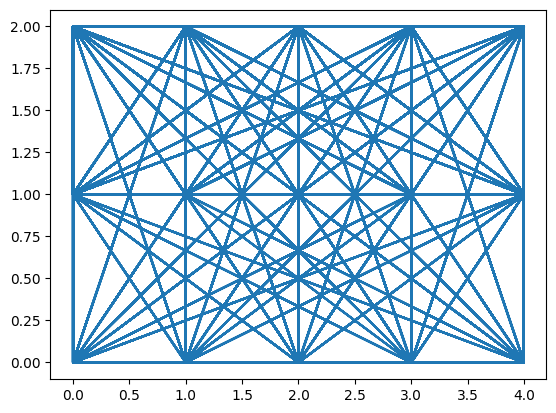

In [ ]:
from matplotlib import pyplot as plt
plt.plot(data["Payment_Mode"],data["Purchase_Frequency"])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.13


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[ 2  0  8  0 12]
 [ 4  0  9  1 10]
 [ 1  2  7  0 13]
 [ 4  0  7  0  7]
 [ 3  0  5  1  4]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.14      0.09      0.11        22
           2       0.00      0.00      0.00        24
           3       0.19      0.30      0.24        23
           4       0.00      0.00      0.00        18
           5       0.09      0.31      0.14        13

    accuracy                           0.13       100
   macro avg       0.08      0.14      0.10       100
weighted avg       0.09      0.13      0.10       100

